In [222]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

# 경향성이 있는 그래프의 선형적으로 증가할 수 있게 하는 함수 
def trend(time, slope = 0):
    return time * slope

# x: 시간축인 함수 plot 함수
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# 120개씩 자르는 함수 
def univariate_data(dataset, start_index, end_index):
    data = []
    history_size = 120
    start_index = start_index + history_size


    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(dataset[indices])

    return np.array(data)

for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:601800].reset_index().drop(columns = ['index'], axis = 0)

for i in range(1,8):
    globals()['df_'+str(i)+'_tmp'] = df_all[85920*(i-1):85920*i].reset_index().drop(columns=['index'], axis=0)


for i in range(1,8):
    mean = globals()['df_'+str(i)+'_tmp']['TEMP'].mean()
    diff  = 261.7292228119181 - mean
    globals()['df_'+str(i)+'_tmp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_tmp'] = globals()['df_'+str(i-5)+'_tmp'].copy()

N = 6
dx = (600 - df_1_tmp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_tmp)-1) # 분당 증가율

time = np.arange(85920)
slope = dx_minute * 2

def trend(time, slope = 0):
    return time * slope

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_tmp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_tmp']['TEMP'] = series


univariate_past_history = 120

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'Group' : [], 'batch_num' : []}

    for j in range(716):
        MEAN = np.round(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)].mean(),3)
        MIN = np.min(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        MAX = np.max(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        STD = np.std(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)])
        data['Group'].append(i)
        data['batch_num'].append(j+1)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)

    globals()['group_'+str(i)] = pd.DataFrame(data)

TIME = pd.DataFrame({'TIME' : np.arange(7876)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = 'index', inplace = True)
df = tmp

for i in range(1,12):
    globals()['df_temp_'+str(i)] = univariate_data(globals()['df_'+str(i)+'_tmp']['TEMP'], 0, len(df_1_tmp)+1)

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, :4].values
X_mean = df['MEAN_TEMP'].values
y = df['Group'].values - 1
X_mean = X_mean.reshape(X_mean.shape[0], 1)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_mean_scale = scaler.fit_transform(X_mean)
e = LabelEncoder()
Y = e.fit_transform(y)
Y = tf.keras.utils.to_categorical(Y)
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size = 0.3, random_state = 96)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




(5513, 4) (2363, 4) (5513,) (2363,)


In [83]:
df_7_tmp

,date,kst,TEMP
0,20230629,9:14,574.443
1,20230629,9:14,574.364
2,20230629,9:15,574.566
3,20230629,9:15,574.407
4,20230629,9:16,574.023
...,...,...,...
85915,20230801,5:11,687.843
85916,20230801,5:12,687.748
85917,20230801,5:12,687.765
85918,20230801,5:13,687.182


In [90]:
df_11_tmp[df_11_tmp['TEMP']>=600]

,date,kst,TEMP
0,20230530,13:09,819.229
1,20230530,13:09,819.306
2,20230530,13:10,819.459
3,20230530,13:10,819.551
4,20230530,13:11,819.425
...,...,...,...
85915,20230629,9:11,933.812
85916,20230629,9:12,934.304
85917,20230629,9:12,934.530
85918,20230629,9:13,934.443


In [6]:
df_1_tmp

,date,kst,TEMP
0,20230101,9:00,286.797
1,20230101,9:00,287.082
2,20230101,9:01,285.938
3,20230101,9:01,285.772
4,20230101,9:02,286.357
...,...,...,...
85915,20230131,5:00,275.915
85916,20230131,5:01,275.912
85917,20230131,5:01,275.909
85918,20230131,5:02,275.784


In [7]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators = 100)

lgbm.fit(X_train, y_train,
         eval_metric = 'logloss',
         eval_set = [(X_test, y_test)])
lgbm_predict = lgbm.predict(X_test)
print(accuracy_score(y_test, lgbm_predict))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 5513, number of used features: 4
[LightGBM] [Info] Start training from score -2.404264
[LightGBM] [Info] Start training from score -2.396264
[LightGBM] [Info] Start training from score -2.374588
[LightGBM] [Info] Start training from score -2.404264
[LightGBM] [Info] Start training from score -2.410306
[LightGBM] [Info] Start training from score -2.430715
[LightGBM] [Info] Start training from score -2.376540
[LightGBM] [Info] Start training from score -2.426600
[LightGBM] [Info] Start training from score -2.394274
[LightGBM] [Info] Start training from score -2.364889
[LightGBM] [Info] Start training from score -2.396264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.7109606432501058


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(accuracy_score(y_test, knn_pred))

0.7181548878544224


In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 96)

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(accuracy_score(y_test, dtc_pred))

0.690224291155311


In [93]:
group_1

,MEAN_TEMP,STD,MIN,MAX,Group,batch_num
0,284.192,1.275722,281.401,287.082,1,1
1,284.353,1.052731,281.236,286.949,1,2
2,285.276,1.043551,282.941,287.552,1,3
3,285.589,0.970639,283.867,288.153,1,4
4,285.146,1.074865,281.689,286.664,1,5
...,...,...,...,...,...,...
711,276.767,0.432311,276.088,277.743,1,712
712,276.214,0.228613,275.733,276.846,1,713
713,275.862,0.400747,274.959,276.750,1,714
714,275.961,0.489980,275.098,277.305,1,715


In [160]:
group_1

,MEAN_TEMP,STD,MIN,MAX,Group,batch_num
0,284.192,1.275722,281.401,287.082,1,1
1,284.353,1.052731,281.236,286.949,1,2
2,285.276,1.043551,282.941,287.552,1,3
3,285.589,0.970639,283.867,288.153,1,4
4,285.146,1.074865,281.689,286.664,1,5
...,...,...,...,...,...,...
711,276.767,0.432311,276.088,277.743,1,712
712,276.214,0.228613,275.733,276.846,1,713
713,275.862,0.400747,274.959,276.750,1,714
714,275.961,0.489980,275.098,277.305,1,715


In [161]:
def change_group(data):
    if data['MEAN_TEMP'] >=600:
        data['Group'] = 1
    else:
        data['Group'] = 0
        

In [170]:
group_1

,MEAN_TEMP,STD,MIN,MAX,Group,batch_num
0,284.192,1.275722,281.401,287.082,1,1
1,284.353,1.052731,281.236,286.949,1,2
2,285.276,1.043551,282.941,287.552,1,3
3,285.589,0.970639,283.867,288.153,1,4
4,285.146,1.074865,281.689,286.664,1,5
...,...,...,...,...,...,...
711,276.767,0.432311,276.088,277.743,1,712
712,276.214,0.228613,275.733,276.846,1,713
713,275.862,0.400747,274.959,276.750,1,714
714,275.961,0.489980,275.098,277.305,1,715


In [171]:
group_1['MEAN_TEMP'][0]

284.192

In [164]:
group_1

In [223]:
def DATASET(DATA):
    #xtrain, xtest, ytrain, ytest = train_test_split(DATA.drop(columns=['Group']), DATA['Group'], test_size = 0.2, random_state = 96)
    xtrain, xtest, ytrain, ytest = train_test_split(DATA.iloc[:, :4], DATA['Group'], test_size = 0.2, random_state = 96)

    return xtrain, xtest, ytrain, ytest

for i in range(1,12):
    data = globals()['group_'+ str(i)]
    globals()['X_train_'+ str(i)], globals()['X_test_'+ str(i)], globals()['y_train_'+ str(i)], globals()['y_test_'+ str(i)] = DATASET(data)

X_train = pd.concat([X_train_1, X_train_2], axis = 0)
X_train = pd.concat([X_train, X_train_3], axis = 0)
X_train = pd.concat([X_train, X_train_4], axis = 0)
X_train = pd.concat([X_train, X_train_5], axis = 0)
X_train = pd.concat([X_train, X_train_6], axis = 0)
X_train = pd.concat([X_train, X_train_7], axis = 0)
X_train = pd.concat([X_train, X_train_8], axis = 0)
X_train = pd.concat([X_train, X_train_9], axis = 0)
X_train = pd.concat([X_train, X_train_10], axis = 0)
X_train = pd.concat([X_train, X_train_11], axis = 0)

y_train = pd.concat([y_train_1, y_train_2], axis = 0)
y_train = pd.concat([y_train, y_train_3], axis = 0)
y_train = pd.concat([y_train, y_train_4], axis = 0)
y_train = pd.concat([y_train, y_train_5], axis = 0)
y_train = pd.concat([y_train, y_train_6], axis = 0)
y_train = pd.concat([y_train, y_train_7], axis = 0)
y_train = pd.concat([y_train, y_train_8], axis = 0)
y_train = pd.concat([y_train, y_train_9], axis = 0)
y_train = pd.concat([y_train, y_train_10], axis = 0)
y_train = pd.concat([y_train, y_train_11], axis = 0)

X_test = pd.concat([X_test_1, X_test_2], axis = 0)
X_test = pd.concat([X_test, X_test_3], axis = 0)
X_test = pd.concat([X_test, X_test_4], axis = 0)
X_test = pd.concat([X_test, X_test_5], axis = 0)
X_test = pd.concat([X_test, X_test_6], axis = 0)
X_test = pd.concat([X_test, X_test_7], axis = 0)
X_test = pd.concat([X_test, X_test_8], axis = 0)
X_test = pd.concat([X_test, X_test_9], axis = 0)
X_test = pd.concat([X_test, X_test_10], axis = 0)
X_test = pd.concat([X_test, X_test_11], axis = 0)

y_test = pd.concat([y_test_1, y_test_2], axis = 0)
y_test = pd.concat([y_test, y_test_3], axis = 0)
y_test = pd.concat([y_test, y_test_4], axis = 0)
y_test = pd.concat([y_test, y_test_5], axis = 0)
y_test = pd.concat([y_test, y_test_6], axis = 0)
y_test = pd.concat([y_test, y_test_7], axis = 0)
y_test = pd.concat([y_test, y_test_8], axis = 0)
y_test = pd.concat([y_test, y_test_9], axis = 0)
y_test = pd.concat([y_test, y_test_10], axis = 0)
y_test = pd.concat([y_test, y_test_11], axis = 0)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [128]:
#scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(accuracy_score(y_test, knn_pred))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 96)

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(accuracy_score(y_test, dtc_pred))

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators = 100)

lgbm.fit(X_train, y_train,
         eval_metric = 'logloss',
         eval_set = [(X_test, y_test)])
lgbm_predict = lgbm.predict(X_test)
print(accuracy_score(y_test, lgbm_predict))

0.7304292929292929
0.6742424242424242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 6292, number of used features: 4
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.7133

In [138]:
# X_test_1 = X_test_1.values.reshape(X_test_1.shape[0], 1)
# X_test_2 = X_test_2.values.reshape(X_test_2.shape[0], 1)
# X_test_3 = X_test_3.values.reshape(X_test_3.shape[0], 1)
# X_test_4 = X_test_4.values.reshape(X_test_4.shape[0], 1)
# X_test_5 = X_test_5.values.reshape(X_test_5.shape[0], 1)
# X_test_6 = X_test_6.values.reshape(X_test_6.shape[0], 1)
# X_test_7 = X_test_7.values.reshape(X_test_7.shape[0], 1)
# X_test_8 = X_test_8.values.reshape(X_test_8.shape[0], 1)
# X_test_9 = X_test_9.values.reshape(X_test_9.shape[0], 1)
# X_test_10 = X_test_10.values.reshape(X_test_10.shape[0], 1)
# X_test_11 = X_test_11.values.reshape(X_test_11.shape[0], 1)

knn_pred_1 = knn.predict(X_test_1)
print(accuracy_score(y_test_1.values, knn_pred_1))

knn_pred_2 = knn.predict(X_test_2)
print(accuracy_score(y_test_2.values, knn_pred_2))

knn_pred_3 = knn.predict(X_test_3)
print(accuracy_score(y_test_3.values, knn_pred_3))

knn_pred_4 = knn.predict(X_test_4)
print(accuracy_score(y_test_4.values, knn_pred_4))

knn_pred_5 = knn.predict(X_test_5)
print(accuracy_score(y_test_5.values, knn_pred_5))

knn_pred_6 = knn.predict(X_test_6)
print(accuracy_score(y_test_6.values, knn_pred_6))

knn_pred_7 = knn.predict(X_test_7)
print(accuracy_score(y_test_7.values, knn_pred_7))

knn_pred_8 = knn.predict(X_test_8)
print(accuracy_score(y_test_8.values, knn_pred_8))

knn_pred_9 = knn.predict(X_test_9)
print(accuracy_score(y_test_9.values, knn_pred_9))

knn_pred_10 = knn.predict(X_test_10)
print(accuracy_score(y_test_10.values, knn_pred_10))

knn_pred_11 = knn.predict(X_test_11)
print(accuracy_score(y_test_11.values, knn_pred_11))

0.9930555555555556
0.8125
0.7986111111111112
0.625
0.7361111111111112
0.6180555555555556
0.7013888888888888
0.6388888888888888
0.6319444444444444
0.7291666666666666
0.75


In [198]:
y_test_5 = np.ones((y_test_5.shape[0], 1))
y_test_6 = np.ones((y_test_6.shape[0], 1))
y_test_7 = np.ones((y_test_7.shape[0], 1))
y_test_8 = np.ones((y_test_8.shape[0], 1))
y_test_9 = np.ones((y_test_9.shape[0], 1))
y_test_10 = np.ones((y_test_10.shape[0], 1))
y_test_11 = np.ones((y_test_11.shape[0], 1))

def function(data):
    if data>=7:
        return 1
    else:
        return 0

# knn_pred_5 = list(map(function, knn_pred_5))
# knn_pred_6 = list(map(function, knn_pred_6))
# knn_pred_7 = list(map(function, knn_pred_7))
# knn_pred_8 = list(map(function, knn_pred_8))
# knn_pred_9 = list(map(function, knn_pred_9))
# knn_pred_10 = list(map(function, knn_pred_10))
# knn_pred_11 = list(map(function, knn_pred_11))

# print(accuracy_score(y_test_5, knn_pred_5))
# print(accuracy_score(y_test_6, knn_pred_6))
# print(accuracy_score(y_test_7, knn_pred_7))
# print(accuracy_score(y_test_8, knn_pred_8))
# print(accuracy_score(y_test_9, knn_pred_9))
# print(accuracy_score(y_test_10, knn_pred_10))
# print(accuracy_score(y_test_11, knn_pred_11))

for i in range(5,12):
    prediction = dtc.predict(globals()['X_test_'+str(i)])
    prediction = list(map(function, prediction))
    print(accuracy_score(globals()['y_test_'+str(i)], prediction))

0.041666666666666664
0.2638888888888889
0.7222222222222222
0.8333333333333334
0.9236111111111112
0.9930555555555556
0.9930555555555556


In [224]:
for i in range(1,12):
    prediction = lgbm.predict(globals()['X_test_'+str(i)])
    print(accuracy_score(globals()['y_test_'+str(i)].values, prediction))

y_test_5 = np.ones((y_test_5.shape[0], 1))
y_test_6 = np.ones((y_test_6.shape[0], 1))
y_test_7 = np.ones((y_test_7.shape[0], 1))
y_test_8 = np.ones((y_test_8.shape[0], 1))
y_test_9 = np.ones((y_test_9.shape[0], 1))
y_test_10 = np.ones((y_test_10.shape[0], 1))
y_test_11 = np.ones((y_test_11.shape[0], 1))

# knn_pred_5 = list(map(function, knn_pred_5))
# knn_pred_6 = list(map(function, knn_pred_6))
# knn_pred_7 = list(map(function, knn_pred_7))
# knn_pred_8 = list(map(function, knn_pred_8))
# knn_pred_9 = list(map(function, knn_pred_9))
# knn_pred_10 = list(map(function, knn_pred_10))
# knn_pred_11 = list(map(function, knn_pred_11))

# print(accuracy_score(y_test_5, knn_pred_5))
# print(accuracy_score(y_test_6, knn_pred_6))
# print(accuracy_score(y_test_7, knn_pred_7))
# print(accuracy_score(y_test_8, knn_pred_8))
# print(accuracy_score(y_test_9, knn_pred_9))
# print(accuracy_score(y_test_10, knn_pred_10))
# print(accuracy_score(y_test_11, knn_pred_11))

for i in range(5,12):
    prediction = lgbm.predict(globals()['X_test_'+str(i)])
    prediction = list(map(function, prediction))
    print(accuracy_score(globals()['y_test_'+str(i)], prediction))

0.9791666666666666
0.6388888888888888
0.8263888888888888
0.5972222222222222
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [159]:
prediction = lgbm.predict(X_test_10)
prediction

array([10,  9,  8, 10, 11, 10, 10,  8, 10, 10, 10, 10, 10, 10, 10,  9,  9,
        8,  9, 10,  8, 10,  8, 10, 10, 10, 10, 10, 10, 10,  9, 10, 11, 10,
        8, 10, 10, 10,  9, 10,  8,  9, 10, 10, 10, 10,  9, 10, 10, 11,  9,
       10,  9, 10, 10,  9, 10, 10, 10,  9,  8, 10, 10, 10,  9, 10, 10, 10,
        8, 10, 10, 10,  7, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  6, 10,
        8, 10,  7, 10, 10, 10, 10,  9, 10, 10, 10, 10, 10, 10, 10, 10,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10,  8, 10, 10,  9, 10,  8, 10,
       10,  9, 10, 10, 10, 10, 10, 10, 10,  9, 10, 10,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10], dtype=int64)

In [131]:
y_test_5 = np.ones((y_test_5.shape[0], 1))
y_test_6 = np.ones((y_test_6.shape[0], 1))
y_test_7 = np.ones((y_test_7.shape[0], 1))
y_test_8 = np.ones((y_test_8.shape[0], 1))
y_test_9 = np.ones((y_test_9.shape[0], 1))
y_test_10 = np.ones((y_test_10.shape[0], 1))
y_test_11 = np.ones((y_test_11.shape[0], 1))

def function(data):
    if data>=7:
        return 1
    else:
        return 0

knn_pred_5 = list(map(function, knn_pred_5))
knn_pred_6 = list(map(function, knn_pred_6))
knn_pred_7 = list(map(function, knn_pred_7))
knn_pred_8 = list(map(function, knn_pred_8))
knn_pred_9 = list(map(function, knn_pred_9))
knn_pred_10 = list(map(function, knn_pred_10))
knn_pred_11 = list(map(function, knn_pred_11))

print(accuracy_score(y_test_5, knn_pred_5))
print(accuracy_score(y_test_6, knn_pred_6))
print(accuracy_score(y_test_7, knn_pred_7))
print(accuracy_score(y_test_8, knn_pred_8))
print(accuracy_score(y_test_9, knn_pred_9))
print(accuracy_score(y_test_10, knn_pred_10))
print(accuracy_score(y_test_11, knn_pred_11))

0.0
0.1736111111111111
0.7777777777777778
0.7916666666666666
0.8680555555555556
0.9930555555555556
0.9652777777777778


## Deep Learning

In [28]:
df

,MEAN_TEMP,STD,MIN,MAX,Group,batch_num,TIME
0,284.192,1.275722,281.401,287.082,1,1,0
1,284.353,1.052731,281.236,286.949,1,2,1
2,285.276,1.043551,282.941,287.552,1,3,2
3,285.589,0.970639,283.867,288.153,1,4,3
4,285.146,1.074865,281.689,286.664,1,5,4
...,...,...,...,...,...,...,...
7871,931.874,2.127380,926.730,936.100,11,712,7871
7872,933.001,0.585021,931.564,934.166,11,713,7872
7873,933.236,0.659152,931.690,934.549,11,714,7873
7874,933.649,0.771575,932.209,935.319,11,715,7874


In [31]:
ts = df.loc[:, ['TIME', 'MEAN_TEMP']]
ts.index = ts.TIME
ts = ts.drop(columns = 'TIME')
ts

,MEAN_TEMP
TIME,
0,284.192
1,284.353
2,285.276
3,285.589
4,285.146
...,...
7871,931.874
7872,933.001
7873,933.236


In [32]:
def plot_ts(data, color, alpha, label):
    
    plt.figure(figsize=(11,5))
    plt.plot(data, color=color, alpha=alpha, label=label)
    plt.title("Mean Temperature of Bindukuri")
    plt.ylabel('Mean temperature')
    plt.legend()
    plt.show()

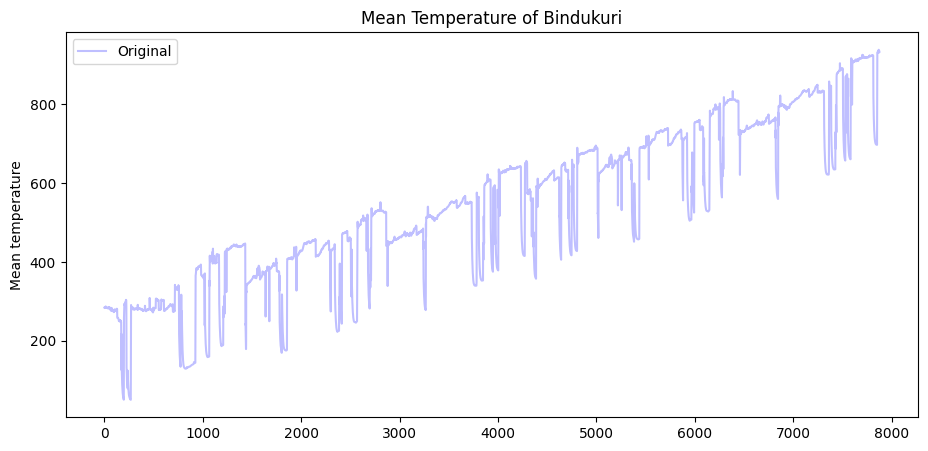

In [33]:
plot_ts(ts, 'blue', 0.25, 'Original')

In [34]:
from statsmodels.tsa.stattools import adfuller

adfuller(ts, autolag = 'AIC')

(-2.9059081437396594,
 0.04466526177036603,
 34,
 7841,
 {'1%': -3.4311842612026977,
  '5%': -2.86190868264678,
  '10%': -2.5669662451530573},
 64017.54430842059)

In [35]:
def ADF_test(data):
	# ADF 실시
    results = adfuller(data, autolag='AIC')
    
    # 통계량
    s = results[0]
    # p-value
    p = results[1]
    # 기각역
    cv = results[4]
    
    # 출력
    print('-'*30)
    print('Augemented Dickey-Fuller Test')
    print('H0 : 단위근이 존재한다 (비정상 시계열)')
    print('Ha : 단위근이 없다 (정상 시계열)')
    print('Critical Values : {}'.format(cv))
    print('-'*30)
    print('Test Statistics : {:.4f}'.format(s))
    print('p-value : {:.4f}'.format(p))
    print('-'*30)
ADF_test(ts)

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4311842612026977, '5%': -2.86190868264678, '10%': -2.5669662451530573}
------------------------------
Test Statistics : -2.9059
p-value : 0.0447
------------------------------


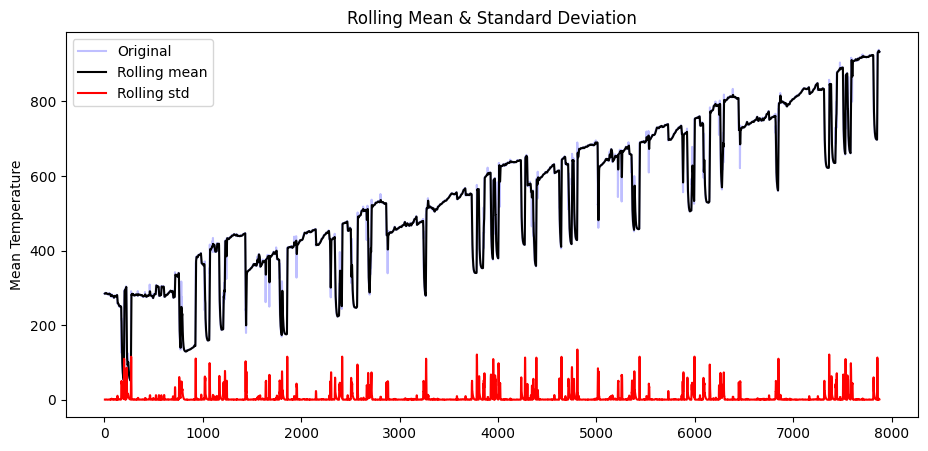

In [36]:
def plot_rolling(data, roll_size):
    # 이동평균함수(rolling) - 평균, 표준편차
    roll_mean = data.rolling(window=roll_size).mean()
    roll_std = data.rolling(window=roll_size).std()
    
    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.25, label='Original')
    plt.plot(roll_mean, color='black', label='Rolling mean')
    plt.plot(roll_std, color='red', label='Rolling std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()

plot_rolling(ts, 6)

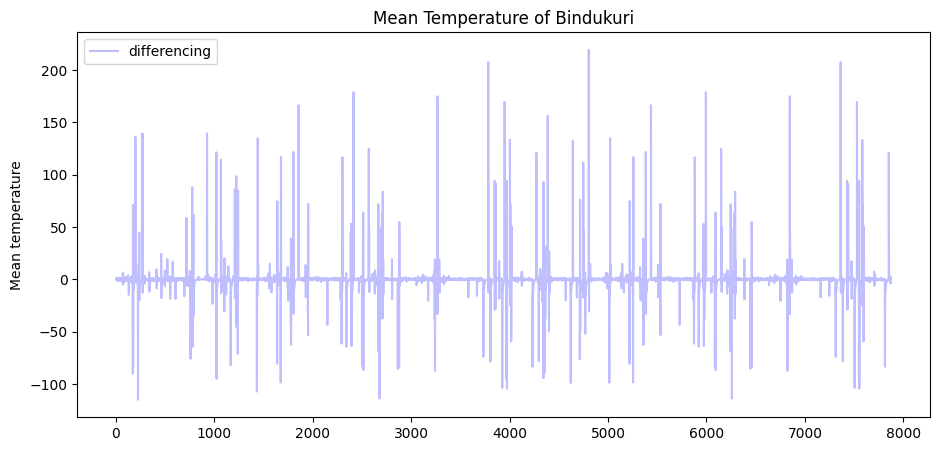

In [39]:
ts_diff = ts - ts.shift() # default=1임

# 시각화
plot_ts(ts_diff, color='blue', alpha=0.25, label='differencing')

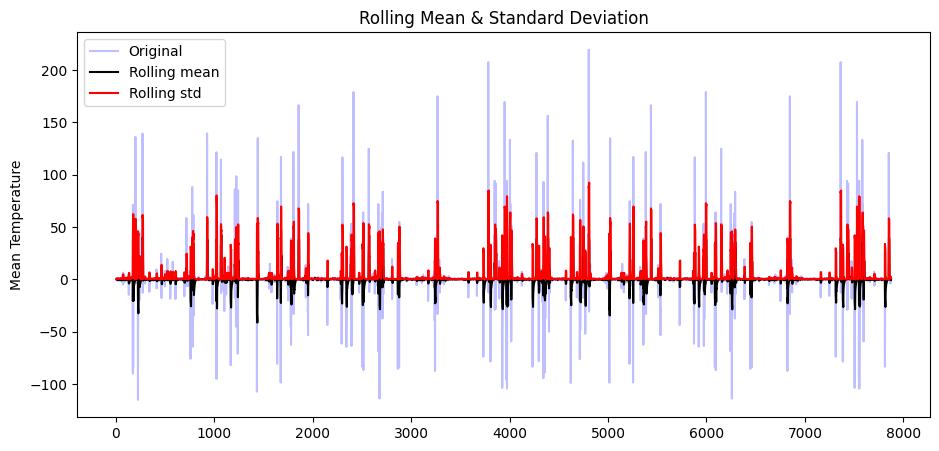

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4311842612026977, '5%': -2.86190868264678, '10%': -2.5669662451530573}
------------------------------
Test Statistics : -18.9031
p-value : 0.0000
------------------------------


In [40]:
plot_rolling(ts_diff, 6)
ADF_test(ts_diff.dropna())

In [41]:
# 차분
ts_diff2 = ts.diff().dropna()

# ADF 테스트
ADF_test(ts_diff2)

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4311842612026977, '5%': -2.86190868264678, '10%': -2.5669662451530573}
------------------------------
Test Statistics : -18.9031
p-value : 0.0000
------------------------------


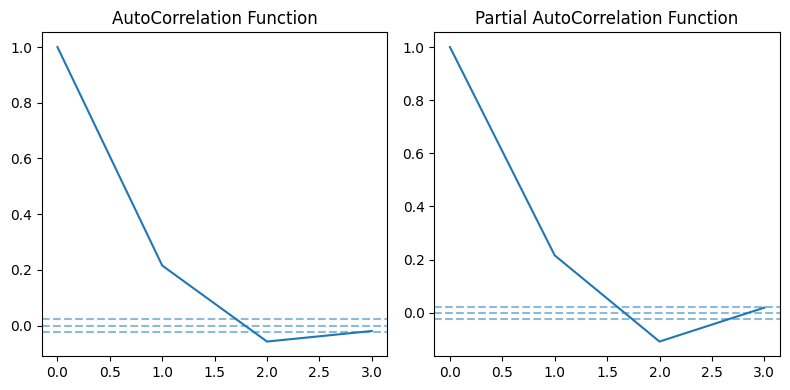

In [42]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf

# ACF
acf_20 = acf(x=ts_diff2, nlags=3)
# PACF
pacf_20 = pacf(x=ts_diff2, nlags=3, method='ols')

# 95% 신뢰구간 계산하기
confidence = 1.96/np.sqrt(len(ts_diff2))

# 시각화
plt.figure(figsize=(8,4))
# ACF
plt.subplot(1,2,1)
plt.plot(acf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')
# PACF
plt.subplot(1,2,2)
plt.plot(pacf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

plt.tight_layout()

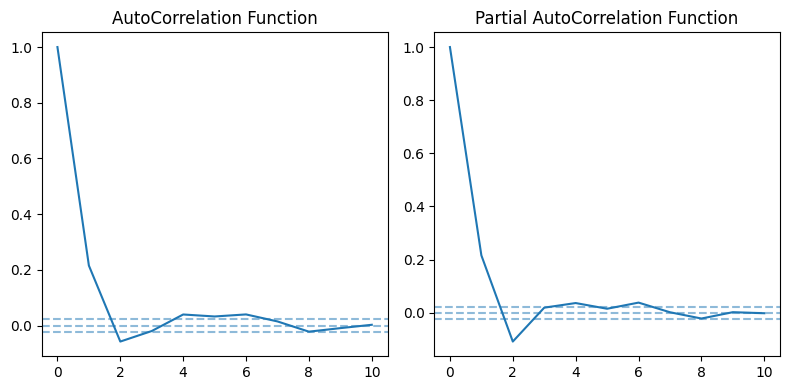

In [21]:
# ACF
acf_10 = acf(x=ts_diff2, nlags=10)
# PACF
pacf_10 = pacf(x=ts_diff2, nlags=10, method='ols')

# 95% 신뢰구간
confidence = 1.96/np.sqrt(len(ts_diff2))

# 시각화
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(acf_10)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')

plt.subplot(1,2,2)
plt.plot(pacf_10)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

plt.tight_layout()

최적의 q값 (신뢰구간 최초 진입 시점)

ACF(q,MA) = 3

최적의 p값 (신뢰구간 최초 진입 시점)

PACF (p, AR) = 3 or 2.6?

In [44]:
ts_copy = ts.copy()
start_idx = ts_copy.index[1]
start_idx

1

In [65]:
ts_copy = ts.copy()
ts_copy.index = pd.DatetimeIndex(ts_copy.index).to_period('D')
ts_copy

,MEAN_TEMP
TIME,
1970-01-01,284.192
1970-01-01,284.353
1970-01-01,285.276
1970-01-01,285.589
1970-01-01,285.146
...,...
1970-01-01,931.874
1970-01-01,933.001
1970-01-01,933.236


In [71]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# index를 period로 변환해주어야 warning이 뜨지 않음
ts_copy = ts.copy()

# 예측을 시작할 위치(이후 차분을 적용하기 때문에 맞추어주었음
start_idx = ts_copy.index[1]

# ARIMA(1,0,1)
model1 = ARIMA(ts_copy, order=(1,0,1))
# fit model
model_fit = model1.fit()

# 전체에 대한 예측 실시
predict = model_fit.predict(start = start_idx)

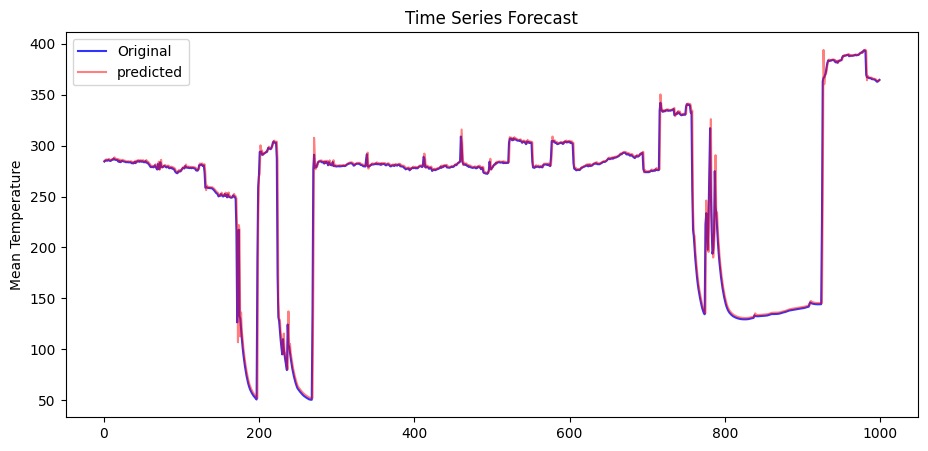

Mean Squared Error : 144.0915


In [76]:
from sklearn.metrics import mean_squared_error

def plot_and_error(data, forecast):
    # MSE 계산
    mse = mean_squared_error(data, forecast)
    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.8 , label='Original')
    plt.plot(forecast, color='red', alpha = 0.5, label='predicted')
    plt.title("Time Series Forecast")
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()
    # MSE 출력
    print('Mean Squared Error : {:.4f}'.format(mse))

plot_and_error(ts[1:1000], predict[:999])